### Try to train with unnormalized target

#### make unnormalized y data

In [243]:
df_qnt0 = df1[['casual', 'registered', 'cnt']]

In [244]:
df_qnt0

casual  registered  cnt
0           3          13   16
1           8          32   40
2           5          27   32
3           3          10   13
4           0           1    1
...       ...         ...  ...
17374      11         108  119
17375       8          81   89
17376       7          83   90
17377      13          48   61
17378      12          37   49

[17379 rows x 3 columns]

In [246]:
df_tgt0 = df_qnt0['cnt']

In [247]:
df_tgt0

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [248]:
tsr_tgt0 = torch.tensor(df_tgt0.values.reshape(len(df_tgt),1)).float()

In [249]:
train_y0 = tsr_tgt0[:-21*24,:]
test_y0 = tsr_tgt0[-21*24:,:]

In [250]:
train_y0.size()

torch.Size([16875, 1])

In [251]:
test_y0.size()

torch.Size([504, 1])

In [252]:
train_set_0 = BSDataset(train_x, train_y0)

In [253]:
test_set_0 = BSDataset(test_x, test_y0)

In [254]:
batch_size = 128

In [255]:
train_dataloader_0 = DataLoader(train_set_0, batch_size=batch_size)
test_dataloader_0 = DataLoader(test_set_0, batch_size=batch_size)

#### make model

In [256]:
mdy0_0 = BSModel(inp_size, hidden_size, output_size)

In [257]:
optimizer_0 = optim.SGD(mdy0_0.parameters(), lr=0.01)

#### train & test

In [258]:
loss_hist_y0_0 = trn_epoches(1000, mdy0_0,loss_fn, train_dataloader_0,optimizer_0)

epoch      0/  1000, loss: 14520.823242
epoch    200/  1000, loss: 4517.897949
epoch    400/  1000, loss: 4265.636719
epoch    600/  1000, loss: 4062.678955
epoch    800/  1000, loss: 4116.007812


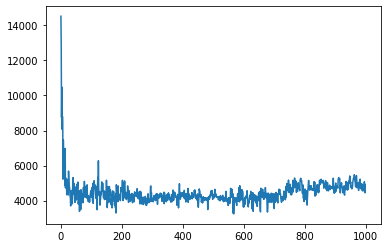

In [259]:
plt.plot(loss_hist_y0_0)

In [260]:
pred_y0_train_0 = test_loop(mdy0_0, train_x, train_y0, loss_fn)

loss: 9231.668945 



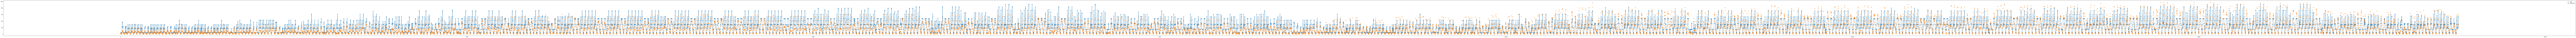

In [261]:
plt.figure(figsize = (500, 7))
pred_data = pred_y0_train_0.numpy()
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(train_y0, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [271]:
tmp = 0
tmr = 20
pred_y0_train_0[tmp*tmr:(tmp+1)*tmr,:]

tensor([[ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [ 46.0578],
        [227.9786],
        [227.9786],
        [369.6851],
        [369.6885],
        [366.1945],
        [193.1671],
        [227.9786],
        [227.9786],
        [227.9786],
        [ 46.0578]])

the prediction values looks very discrete.

In [272]:
pred_y0_test_0 = test_loop(mdy0_0, test_x, test_y0, loss_fn)

loss: 6366.573730 



pred vs target, test data

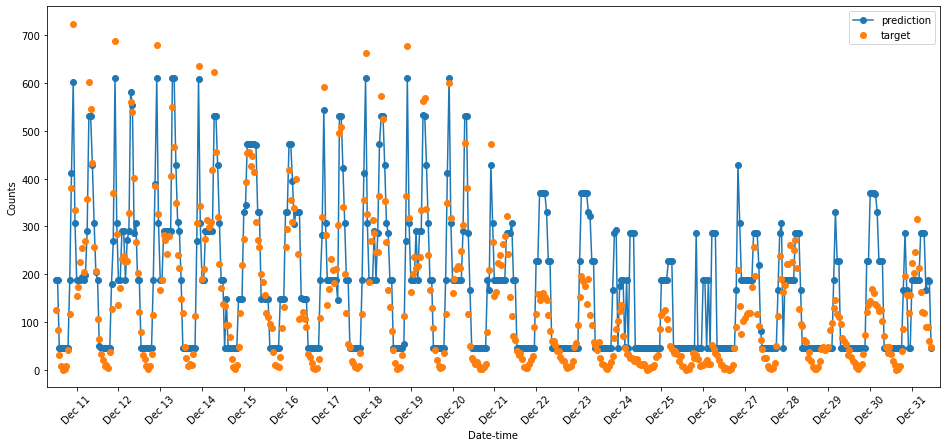

In [273]:
fig, ax = plt.subplots(figsize = (16, 7))

ax.plot(pred_y0_test_0, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.margins(x=0.01)
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

the predictions still looks discrete on test data

try train more epoches

In [274]:
loss_hist_y0_1 = trn_epoches(1000, mdy0_0,loss_fn, train_dataloader_0,optimizer_0)

epoch      0/  1000, loss: 4511.705566
epoch    200/  1000, loss: 4871.833984
epoch    400/  1000, loss: 4697.482910
epoch    600/  1000, loss: 4733.706543
epoch    800/  1000, loss: 4775.299805


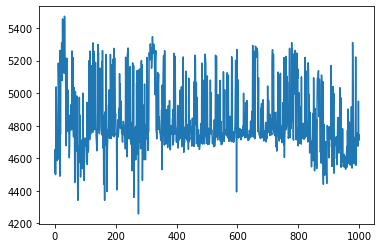

In [275]:
plt.plot(loss_hist_y0_1)

In [277]:
pred_y0_train_1 = test_loop(mdy0_0, train_x, train_y0, loss_fn)

loss: 9230.348633 



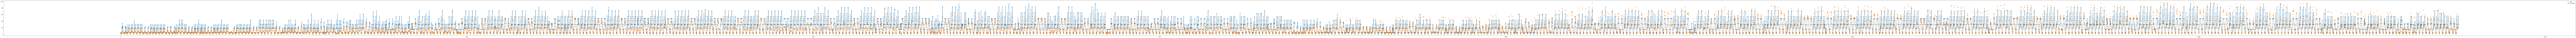

In [278]:
plt.figure(figsize = (500, 7))
pred_data = pred_y0_train_1.numpy()
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(train_y0, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [279]:
pred_y0_test_1 = test_loop(mdy0_0, test_x, test_y0, loss_fn)

loss: 6245.776855 



prediction vs target, test data

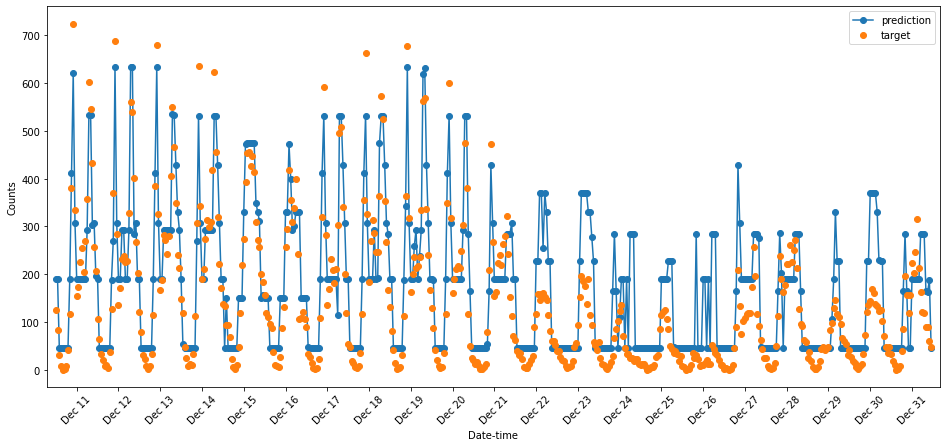

In [280]:
fig, ax = plt.subplots(figsize = (16, 7))

ax.plot(pred_y0_test_1, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.margins(x=0.01)
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

still discrete.

inspect the weights & try to figure out the problem.

In [283]:
dict_y00 = dict(mdy0_0.named_parameters())

In [284]:
dict_y00.keys()

dict_keys(['stack.0.weight', 'stack.0.bias', 'stack.2.weight', 'stack.2.bias'])

In [285]:
dict_y00['stack.2.weight']

Parameter containing:
tensor([[142.7647, 238.7746,  73.7048,  91.6450,  68.2360, 180.3937, 103.8330,
          60.7666, 101.4239, 118.9603]], requires_grad=True)

In [298]:
dict_y00['stack.2.bias']

Parameter containing:
tensor([46.3774], requires_grad=True)

In [304]:
np.unique(pred_y0_test_1.flatten().numpy())

array([ 46.37741 ,  46.377415,  46.377453,  46.377502,  46.377506,
        46.37751 ,  46.377655,  46.37837 ,  46.381298,  46.39172 ,
        46.40784 ,  46.43299 ,  46.600513,  46.933994,  47.80509 ,
        48.079967,  48.481598,  54.11628 ,  55.252335, 106.56305 ,
       111.57703 , 115.09475 , 150.2104  , 150.2109  , 150.22368 ,
       151.03204 , 156.68576 , 162.82834 , 165.33775 , 165.3378  ,
       165.99936 , 187.61932 , 188.9041  , 189.004   , 189.1091  ,
       189.14212 , 189.1422  , 189.14227 , 189.14252 , 189.14334 ,
       189.15094 , 189.15231 , 189.18922 , 189.2653  , 189.34138 ,
       190.14452 , 193.0304  , 197.15413 , 202.78183 , 226.74821 ,
       226.7497  , 226.77113 , 226.77116 , 226.77144 , 227.95618 ,
       230.51976 , 237.767   , 255.91177 , 258.49515 , 269.17075 ,
       269.24612 , 275.025   , 277.8958  , 283.25824 , 285.15204 ,
       285.22192 , 286.02307 , 292.91595 , 292.96768 , 292.9719  ,
       292.97382 , 292.97464 , 292.9749  , 292.97507 , 292.975

In [288]:
pred_y0_test_1.size()

torch.Size([504, 1])

In [299]:
pred_y0_test_1.flatten().numpy().sort()

In [300]:
pred_y0_test_1

tensor([[ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],
        [ 46.3774],


In [313]:
dict_y00['stack.0.bias']

Parameter containing:
tensor([ -37.4714,  -52.8333,  -23.6426,  -29.9051,  -25.3970,  -83.2846,
          -6.9793,  -19.1857,  -74.7415, -109.6713], requires_grad=True)

huge negative bias may make most of the neurons inactivate, then only a few neurons contribute to the prediction. Therefore, the prediction values are descrite becaused it's produced by a few sigmoid functions.